### Import library

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn import tree
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from datetime import datetime as dt
# import seaborn as sns
from IPython.core.display import Image

### Import data
- input data needed
    - obserbed timeseriese data 
    - albedo/tbb timeseriese data

In [14]:
#albedo
#filename1='/Users/ojt_camp01/Himawari8/DataRepository/FREA/201504/rawdata/satellite/rhop_B02.txt'

# ground measure
#filename2='/Users/ojt_camp01/Himawari8/DataRepository/FREA/201504/rawdata/ground_mesure/FREA_Roof_AWS_TBL101_201504.DAT'
#files=['data/ts_FREA_H_0401-0430.txt', 'data/ts_rhop_B01_0401-0430.txt', 'data/ts_rhop_B02_0401-0430.txt']
# B01 - B16
#files=['data/Aplil/ts_FREA_H.txt','data/Aplil/ts_rhop_B01.txt','data/Aplil/ts_rhop_B02.txt','data/Aplil/ts_rhop_B03.txt','data/Aplil/ts_rhop_B04.txt','data/Aplil/ts_rhop_B05.txt','data/Aplil/ts_rhop_B06.txt','data/Aplil/ts_rhop_B07.txt','data/Aplil/ts_rhop_B08.txt','data/Aplil/ts_rhop_B09.txt','data/Aplil/ts_rhop_B10.txt','data/Aplil/ts_rhop_B11.txt','data/Aplil/ts_rhop_B12.txt','data/Aplil/ts_rhop_B13.txt','data/Aplil/ts_rhop_B14.txt','data/Aplil/ts_rhop_B15.txt','data/Aplil/ts_rhop_B16.txt']

# without B03, B04, dewpoint
#files=['data/Aplil/ts_FREA_H.txt','data/Aplil/ts_rhop_B01.txt','data/Aplil/ts_rhop_B02.txt', 'data/Aplil/ts_rhop_B05.txt','data/Aplil/ts_rhop_B06.txt','data/Aplil/ts_rhop_B07.txt','data/Aplil/ts_rhop_B08.txt','data/Aplil/ts_rhop_B09.txt','data/Aplil/ts_rhop_B10.txt','data/Aplil/ts_rhop_B11.txt','data/Aplil/ts_rhop_B12.txt','data/Aplil/ts_rhop_B13.txt','data/Aplil/ts_rhop_B14.txt','data/Aplil/ts_rhop_B15.txt','data/Aplil/ts_rhop_B16.txt']

# only B01, B02
#files=['data/April/ground_measure/ts_FREA_H.txt','data/April/satellite/ts_rhop_B01.txt','data/April/satellite/ts_rhop_B02.txt','data/April/satellite/ts_rhop_B03.txt', 'data/April/satellite/ts_rhop_B04.txt','data/April/satellite/ts_rhop_B05.txt', 'data/April/satellite/ts_rhop_B06.txt']
#files=['data/Aplil/ts_FREA_H.txt','data/Aplil/ts_rhop_B01.txt','data/Aplil/ts_rhop_B02.txt']
#files=['data/Aplil/ts_FREA_H.txt','data/Aplil/ts_rhop_B05.txt']

#files=['data/AprilMay/ts_FREA_H.txt', 'data/AprilMay/ts_rhop_B02.txt']


In [ ]:
files=['data/April/ground_measure/ts_FREA_H.txt','data/April/satellite/ts_rhop_B01.txt','data/April/satellite/ts_rhop_B02.txt','data/April/satellite/ts_rhop_B03.txt', 'data/April/satellite/ts_rhop_B04.txt','data/April/satellite/ts_rhop_B05.txt', 'data/April/satellite/ts_rhop_B06.txt']


In [10]:
# load files
data = [np.loadtxt(f,delimiter="\t", skiprows=1, dtype={'names':('Time','Value'),'formats':('S18','f8')}) for f in files]


/Users/ojt_camp01/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


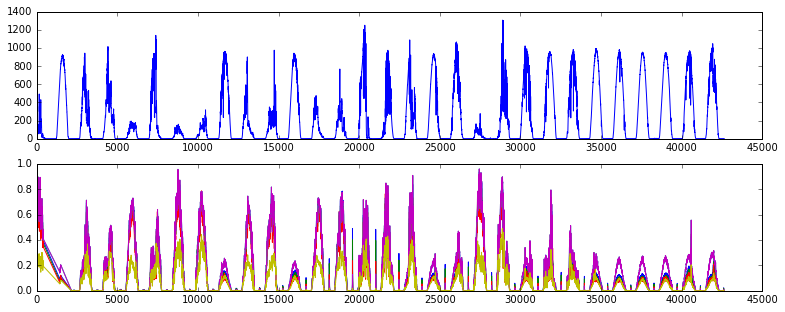

In [11]:
data2 = data
DATA_NUM = len(data)
# plot loaded data
labels = ['B01', 'B02','B05']
plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.plot(data[0]['Value'],lw=1) # True data
plt.subplot(2,1,2)
[plt.plot(data[i]['Value'], lw=1, ) for i in range(1,DATA_NUM)] # Albedo data
plt.legend()
plt.savefig("FREAbands.png", dpi=250)


In [12]:
# add time column
data = [ d['Value'] for d in data ]

time_data = [dt.strptime(str(d)[3:20], '%d-%b-%Y %H:%M') for d in data2[0]['Time']]
#data.append(np.transpose([d.month for d in time_data]))
data.append(np.transpose([d.day for d in time_data]))
data.append(np.transpose([d.hour for d in time_data]))
data.append(np.transpose([d.minute for d in time_data]))

DATA_NUM = len(data)
#data = data[2500:40000]

In [13]:
[print(np.size(s)) for s in data]

42650
42650
42650
42650
42650
42650
42650
42650
42650
42650


[None, None, None, None, None, None, None, None, None, None]

### Devide to train data and test data

In [44]:
idx_c = int((len(data[0])*0.7))
train_data = [d[2500:idx_c] for d in data]
train_label = train_data[0]
train_data = [train_data[i] for i in range(1,DATA_NUM)]

test_data  = [d[idx_c:] for d in data]
true_data = test_data[0]
B01_data = test_data[1] 
B02_data = test_data[2]
B05_data = test_data[3]

test_data = [test_data[i] for i in range(1,DATA_NUM)]

In [45]:
# DEBUG (checking the shape of data)
print(np.shape(np.transpose(train_data)))
print(np.shape(train_label))
print('test data size', np.shape(test_data))
print('true data size',np.shape(true_data))

(27354, 8)
(27354,)
test data size (8, 12796)
true data size (12796,)


In [46]:
train_data

[array([ 0.0005    ,  0.0005    ,  0.0005    , ...,  0.00073529,
         0.00079412,  0.00085294]),
 array([ 0.0005    ,  0.00035714,  0.00021429, ...,  0.001     ,
         0.001     ,  0.001     ]),
 array([ 0.00045   ,  0.00075   ,  0.00105   , ...,  0.00183333,
         0.0025    ,  0.002     ]),
 array([ 0.00045   ,  0.00075   ,  0.00105   , ...,  0.00183333,
         0.0025    ,  0.002     ]),
 array([ 0.    ,  0.    ,  0.    , ...,  0.001 ,  0.001 ,  0.0008]),
 array([ 2,  2,  2, ..., 21, 21, 21]),
 array([17, 17, 17, ..., 17, 17, 17]),
 array([42, 43, 44, ..., 41, 42, 43])]

### 訓練データの作成

In [160]:
import numpy as np
def separate_list(arr, start, end):
    if type(arr) is np.ndarray:
        arr_ext = arr[start:end]
        arr_res = np.r_[arr[0:start], arr[end:-1]]
    elif type(arr) is list:
        arr_ext = arr[start:end]    
        arr_res = arr[0:start] + arr[end:-1]
    return [arr_ext, arr_res]

#### 各パターンの日時インデックスをセット

In [21]:
test_idx=[]
test_idx.append([36894,38332])
test_idx.append([5222,6660])
test_idx.append([41214,42651])
test_idx.append([19622,21060])
test_idx

[[36894, 38332], [5222, 6660], [41214, 42651], [19622, 21060]]

#### パターン A
##### テストデータと訓練データの生成

In [161]:
data_A = [separate_list(d,test_idx[0][0], test_idx[0][1]) for d in data] 
data_A_test = [d[0] for d in data_A] 
data_A_train = [d[1] for d in data_A]

##### 訓練データのラベルとデータへの分離

In [181]:
train_label_A = data_A_train[0]
train_data_A = [data_A_train[i] for i in range(1,DATA_NUM)]
test_data_A = [data_A_test[i] for i in range(1,DATA_NUM)]

In [184]:
print(len(data_A_test))
print(len(data_A_train))
print(len(train_label_A))
print(len(train_data_A))
print(len(test_data_A))


10
10
41211
9
9


#### パターン B

#### パターン C

#### パターン D 

### Estimation irradiance by Random Forest

In [175]:
estimated = [];
for i in range(0,1): 
    estimator = RandomForestRegressor()
    model = RandomForestRegressor(n_estimators=5, n_jobs=-1)
    model.fit(np.transpose(train_data), np.array(train_label, dtype=np.float64))
    estimated.append(model.predict(np.transpose(test_data)))

NameError: name 'train_data' is not defined

#### 共通

#### パターン A 

In [186]:
estimated_A = [];
estimator = RandomForestRegressor()
model = RandomForestRegressor(n_estimators=5, n_jobs=-1)
model.fit(np.transpose(train_data_A), np.array(train_label_A, dtype=np.float64))
estimated_A.append(model.predict(np.transpose(test_data_A)))

#### パターン B

#### パターン C

#### パターン D 

### Results

In [ ]:
fig=plt.figure(figsize=(15, 5))

plt.subplot(2,2,1)
[plt.plot(d) for d in train_data[0:3]]
plt.subplot(2,2,2)
[plt.plot(d) for d in test_data[0:3]]

plt.subplot(2,2,3)
plt.plot(train_label)

plt.subplot(2,2,4)
plt.plot(estimated[0])
#plt.plot(true_data)
plt.savefig("trainingdata_and_result", dpi=250)

#### パターン A 

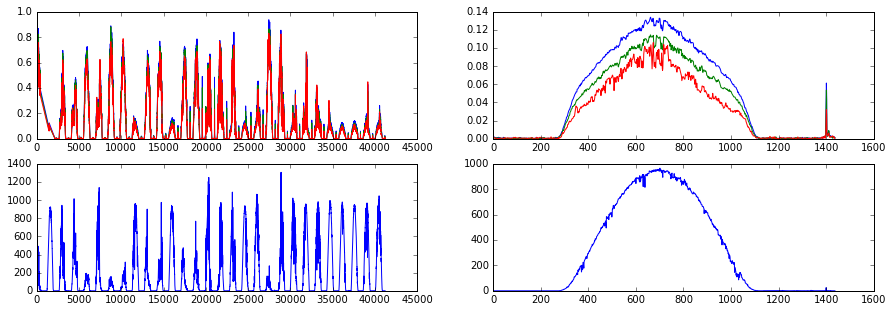

In [187]:
fig=plt.figure(figsize=(15, 5))

plt.subplot(2,2,1)
[plt.plot(d) for d in train_data_A[0:3]]
plt.subplot(2,2,2)
[plt.plot(d) for d in test_data_A[0:3]]

plt.subplot(2,2,3)
plt.plot(train_label_A)

plt.subplot(2,2,4)
plt.plot(estimated_A[0])
#plt.plot(true_data)
plt.savefig("trainingdata_and_result", dpi=250)


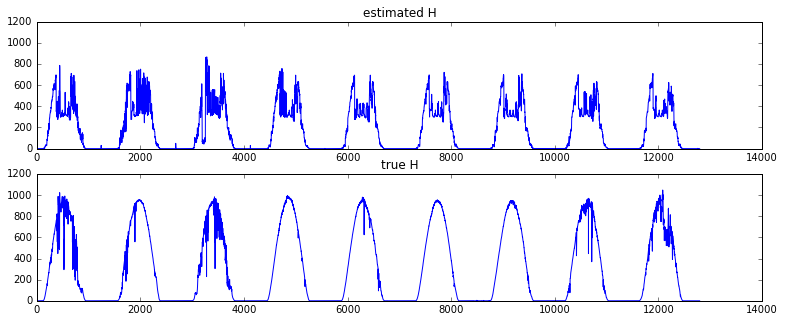

In [49]:
plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.title("estimated H")
plt.ylim(0,1200)
plt.plot(estimated[0], lw=1)

plt.subplot(2,1,2)
plt.title("true H")
plt.ylim(0,1200)
plt.plot(true_data, lw=1)

#plt.plot(B01_data*1000)
#plt.plot(B02_data*1000)


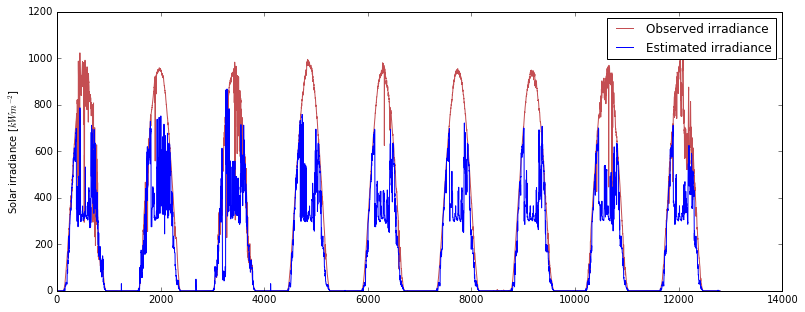

In [50]:
plt.figure(figsize=(13, 5))
plt.title("")
plt.ylim(0,1200)
plt.plot(true_data,  label="Observed irradiance", color='#c44e52',lw=1)
plt.plot(estimated[0],  label="Estimated irradiance", lw=1)
plt.legend()
plt.ylabel(r'Solar irradiance [$kWm^{-2}$]')

plt.savefig("RFestimate_and_observed", dpi=250)


RMSE:
    MAX: 245.73529218
    MIN: 245.73529218
   MEAN: 245.73529218
Coeff:
    MAX: 0.85708678625
    MIN: 0.85708678625
   MEAN: 0.85708678625


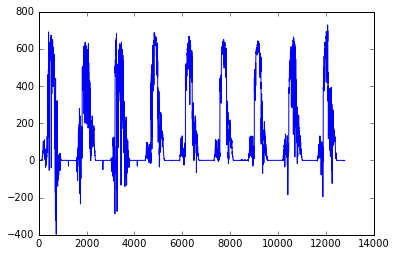

In [51]:
RMSE = [];
Coef = [];
for i in range(len(estimated)):
    error = true_data - estimated[i]
    plt.plot(error,lw=1)
    RMSE.append(np.sqrt(np.mean((error)*(error))))
    std = np.std(error)
    Coef.append(np.corrcoef(true_data, estimated[i])[1][0])
#    print('Coeff:', Coef[i])
#    print("RMSE:",RMSE[i])

    
print('RMSE:')
print('    MAX:', max(RMSE))
print('    MIN:', min(RMSE))
print('   MEAN:', np.mean(RMSE))
print('Coeff:')
print('    MAX:', max(Coef))
print('    MIN:', min(Coef))
print('   MEAN:', np.mean(Coef))

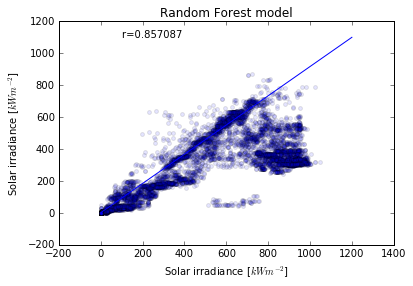

In [52]:
t_est = np.array([1,1200]); t_true = np.array([1,1100]);
plt.scatter(true_data, estimated[0], alpha=0.1, s=15)
plt.plot(t_est,t_true);
plt.ylabel(r'Solar irradiance [$kWm^{-2}$]')
plt.xlabel(r'Solar irradiance [$kWm^{-2}$]')
plt.title('Random Forest model')
plt.text(100,1100,r'r=%f '%(np.corrcoef((true_data, estimated[0]))[0,1]) )
np.correlate(t_est,t_true)
plt.savefig("RFaccuracy", dpi=250)
